# Рынок заведений общественного питания Москвы
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

# 1 Изучение данных из файла

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
from io import BytesIO
import requests

In [2]:
# Открываем файл и выводим первые 10 строк
data = pd.read_csv('/datasets/rest_data.csv')
display(data.head(10))
# Вызываем функцию info() для оценки заполненности таблицы, соответствия типов данных столбцов хранимым в них значениях
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
# проверим содержимое столбцов с категориальными значениями
columns = ['object_name', 'object_type']
for column in columns:
    display(data[column].value_counts())

Столовая                               267
Кафе                                   236
Шаурма                                 234
KFC                                    155
Шоколадница                            142
                                      ... 
Лангуст                                  1
Пилпили                                  1
Стрит. Еда.                              1
Кафе Вьетнамской кухни «Дядюшка Хо»      1
Кафейня Musetti                          1
Name: object_name, Length: 10393, dtype: int64

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [4]:
# Найдем количество явных дубликатов, используя методод duplicated, тк нужно найти дубликаты по строкам 
display(data.duplicated().sum())

0

In [5]:
# Проверим дубликаты без колонки 'id' и удалим их
display(data.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum())
data = data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number']).reset_index()
display(data.info())

82

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15284 entries, 0 to 15283
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        15284 non-null  int64 
 1   id           15284 non-null  int64 
 2   object_name  15284 non-null  object
 3   chain        15284 non-null  object
 4   object_type  15284 non-null  object
 5   address      15284 non-null  object
 6   number       15284 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 836.0+ KB


None

In [6]:
# Создадим столбец object_name_new на основе столбца object_name, в котором уберем из названий слова типа "кафе", "ресторан" и тд
# если в названиях есть только эти слова, обозначим их как "без названия"
data['object_name_new'] = data['object_name'].str.replace('кафе|ресторан|столовая|пиццерия|«|»', '', regex=True, case=False)
data.loc[data['object_name_new'] == '', 'object_name_new'] = 'без названия'
columns = ['object_name', 'object_type', 'object_name_new']
for column in columns:
    display(data[column].value_counts())

Столовая                    267
Шаурма                      226
Кафе                        222
KFC                         155
Шоколадница                 142
                           ... 
ID Cafe здоровое питание      1
Столовая ЦО 1402              1
Рестран PERFECT               1
Лангуст                       1
Кафейня Musetti               1
Name: object_name, Length: 10393, dtype: int64

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1898
бар                                   855
буфет                                 577
кафетерий                             395
закусочная                            349
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

без названия    617
Шаурма          226
KFC             155
Шоколадница     142
Бургер Кинг     122
               ... 
Стрит. Еда.       1
САМАРКАНД         1
Вино и гады       1
Токмакоff         1
 Прогресс         1
Name: object_name_new, Length: 10234, dtype: int64

In [7]:
# Приведем разные варианты одного названия (для основных сетей) к единому
synonyms = {'McDonalds': ['МАКДОНАЛДС','Макдоналдс'],
            'KFC' : ['KFC Волгоградский', 'КФС АмРест', 'KFC.', 'kfc'],
            'Krispy Creme' : ['Krispy Krem','Krispy Kreme'],
            'Dominos Pizza' : ['Domino-s Pizza', "Домино'с Пицца", "ДОМИНО'С ПИЦЦА", "Домино'с Пицца Domino,s Pizza"],
            'Якитория' : ['ЯКИТОРИЯ'],
            'Шоколадница' : ['ШОКОЛАДНИЦА']
           }
def chek_synonyms(cell):
    for name, syn in synonyms.items():
        if cell in syn:
            return name
    return cell 
data['object_name_new'] = data['object_name_new'].apply(chek_synonyms)
data[['object_name', 'object_name_new']].query('object_name_new == "Krispy Creme"').head(10)

,object_name,object_name_new
685,Krispy Creme,Krispy Creme
1274,Krispy Kreme,Krispy Creme
1851,Krispy Creme,Krispy Creme
5203,Krispy Krem,Krispy Creme
5323,Krispy Creme,Krispy Creme
6637,Krispy Krem,Krispy Creme
8138,Krispy Creme,Krispy Creme
8458,Krispy Creme,Krispy Creme
14864,Krispy Kreme,Krispy Creme
14996,Krispy Creme,Krispy Creme


In [8]:
data['object_name_new'].value_counts()

без названия       617
Шаурма             226
KFC                158
Шоколадница        158
McDonalds          152
                  ... 
True Pho             1
Рестран PERFECT      1
Лангуст              1
Пилпили              1
 Прогресс            1
Name: object_name_new, Length: 10221, dtype: int64

**Вывод:**
1. Столбцы таблицы заполнены полностью, пропусков нет.
2. Явных дубликатов нет.
3. Замену типа данных столбца "chain" на булевский производить не стали ввиду нецелесообразности.
4. Для основных сетей привели разные варианты названий к единому.

# 2 Анализ данных

In [9]:
# Исследуем соотношение видов объектов общественного питания по количеству
data_object = data.groupby('object_type')['id'].count().reset_index().sort_values(by = 'id', ascending = False)
display(data_object)

,object_type,id
3,кафе,6071
8,столовая,2584
7,ресторан,2282
6,предприятие быстрого обслуживания,1898
0,бар,855
1,буфет,577
4,кафетерий,395
2,закусочная,349
5,магазин (отдел кулинарии),273


Text(0.5, 1.0, 'Cоотношение видов объектов общественного питания по количеству')

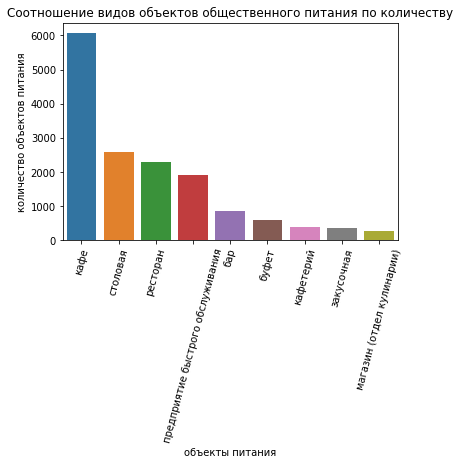

In [10]:
sns.barplot(x='object_type', y='id', data=data_object)
plt.xticks(rotation=75)
plt.xlabel('объекты питания')
plt.ylabel('количество объектов питания')
plt.title('Cоотношение видов объектов общественного питания по количеству')

Вывод: больше всего по количеству - кафе, меньше всего - отделов кулинарии в магазинах.

Text(0.5, 1.0, 'Cоотношение сетевых и несетевых заведений по количеству')

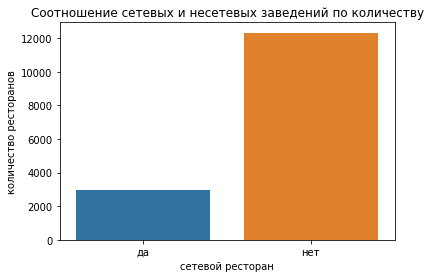

In [11]:
# Исследуем соотношение сетевых и несетевых заведений по количеству.
data_chain = data.groupby('chain')['id'].count().reset_index()
sns.barplot(x='chain', y='id', data=data_chain)
plt.xlabel('сетевой ресторан')
plt.ylabel('количество ресторанов')
plt.title('Cоотношение сетевых и несетевых заведений по количеству')



Вывод: Преобладают несетевые заведения (их больше в 4 раза).

Text(0.5, 1.0, 'Cоотношение видов сетевых объектов общественного питания по количеству')

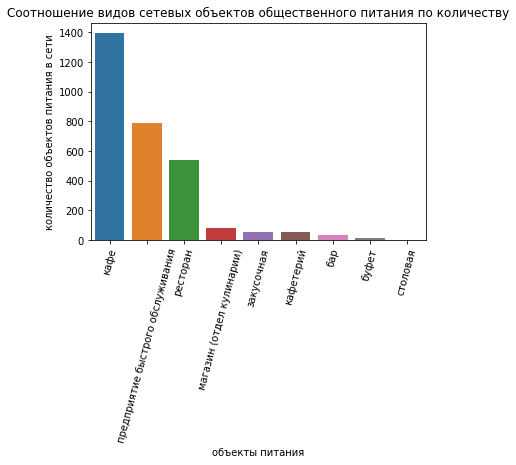

In [12]:
# Отберем сетевые рестораны
rest_group = data.query('chain == "да"')
# Посчитаем количество заведений для каждого вида сетевого объекта общественного питания
rest_group_object = rest_group.groupby('object_type')['id'].count().reset_index().sort_values(by = 'id', ascending = False)
sns.barplot(x='object_type', y='id', data=rest_group_object)
plt.xticks(rotation=75)
plt.xlabel('объекты питания')
plt.ylabel('количество объектов питания в сети')
plt.title('Cоотношение видов сетевых объектов общественного питания по количеству')

Вывод: среди сетевых заведений больше всего кафе, меньше всего -столовых.

Text(0.5, 1.0, 'Cоотношение видов сетевых объектов общественного питания по количеству')

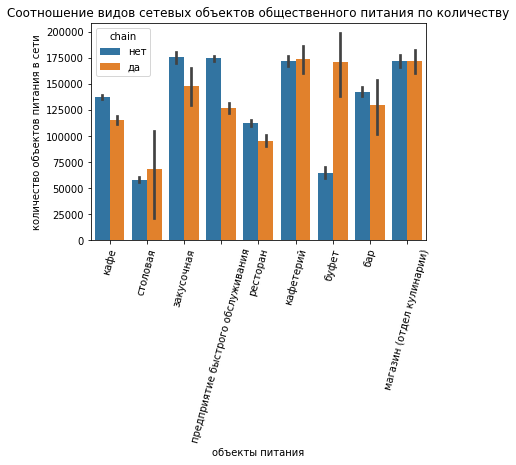

In [13]:
sns.barplot(
           x='object_type',
            y='id',
            hue='chain',
            data=data
)
plt.xticks(rotation=75)
plt.xlabel('объекты питания')
plt.ylabel('количество объектов питания в сети')
plt.title('Cоотношение видов сетевых объектов общественного питания по количеству')

Вывод: для кафе, закусочных, предприятий быстрого обслуживания, ресторанов, баров сетевое распространение не характерно. Сетевые заведения чаще встречаются среди, столовых, кафетерий, буфетов, для отделов кулинарии одинаково характерны и сетевые, и несетевые заведения.

In [14]:
# Посчитаем для каждой сети число заведений и среднее число посадочних мест в ее заведениях
rest_group = rest_group.groupby('object_name_new').agg({'id' : 'count', 'number' : 'mean'})
display(rest_group)


,id,number
object_name_new,,
Costa coffee,2,20.500000
Florentini,1,95.000000
KFC,15,52.266667
PRIME Прайм стар,2,22.500000
Prime (Прайм стар),1,2.000000
...,...,...
Якитория,38,117.157895
Якитория и Ян Примус,1,282.000000
Ян Примус,1,300.000000


In [15]:
# Отсортируем те заведения, у которых в сети по 1 ресторану (что странно для сети)
rest_group = rest_group[rest_group['id'] > 1]
display(rest_group)

,id,number
object_name_new,,
Costa coffee,2,20.500000
KFC,15,52.266667
PRIME Прайм стар,2,22.500000
Starbucks,2,29.500000
Subway,2,39.000000
...,...,...
Чебуречная СССР,6,45.666667
Шантимель,5,19.600000
Шоколадница,157,57.184713


In [16]:
# Найдем медиану по посадочным местам для дальнейших расчетов
display(rest_group['number'].median())

44.79153005464481

In [17]:
# Будем считать, что много заведений - это более 5 в сети
rest_group['rest_num_group'] = 'Мало заведений'
rest_group.loc[rest_group['id'] > 5, 'rest_num_group'] = 'Много заведений'

In [18]:
# Будем считать, что много посадочных мест - это больше медианы
rest_group['seat_num_group'] = 'Мало посадочных мест'
rest_group.loc[rest_group['number'] > 45, 'seat_num_group'] = 'Много посадочных мест'

In [19]:
# Cоздадим группы по признакам мало/много заведений и мало/много посадочных мест
rest_group['Группа'] = rest_group['rest_num_group'].astype('str') + ' - ' + rest_group['seat_num_group'].astype('str')

,Число сетей,Медианное число заведений,Медианное число посадочных мест
Группа,,,
Мало заведений - Мало посадочных мест,91,2,19.600000
Мало заведений - Много посадочных мест,95,3,83.500000
Много заведений - Мало посадочных мест,46,12,20.915441
Много заведений - Много посадочных мест,42,10,83.309524


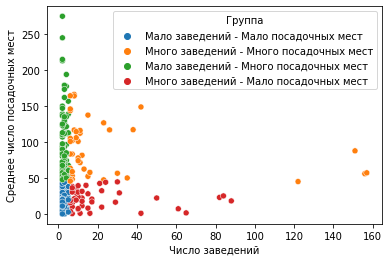

In [20]:
sns.scatterplot(data = rest_group, x = 'id', y = 'number', hue = 'Группа')
plt.xlabel('Число заведений'), plt.ylabel('Среднее число посадочных мест')
rest_group.reset_index().groupby('Группа').agg({'object_name_new': 'nunique', 'id': 'median', 'number': 'median'})\
                                          .rename(columns = {'object_name_new': 'Число сетей',
                                                             'id': 'Медианное число заведений',
                                                             'number': 'Медианное число посадочных мест'})

Вывод: Для сетевых заведений больше характерно мало заведений с большим количеством посадочных мест.

object_type
бар                                   43.533333
буфет                                 51.509532
закусочная                             7.825215
кафе                                  39.785703
кафетерий                              9.184810
магазин (отдел кулинарии)              5.589744
предприятие быстрого обслуживания     20.808219
ресторан                              96.884750
столовая                             130.337848
Name: number, dtype: float64

<AxesSubplot:xlabel='object_type'>

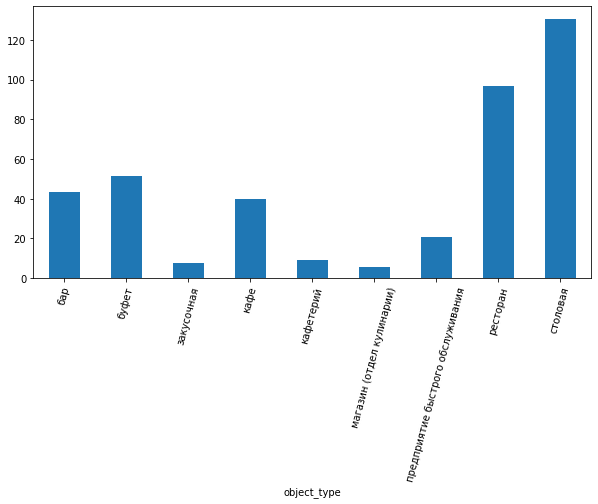

In [21]:
# Найдем среднее количество посадочных мест для каждого вида объекта общественного питания 
numbers = data.groupby('object_type')['number'].mean()
display(numbers)
numbers.plot(kind='bar', rot=75, figsize=(10,5))

Вывод: в среднем, больше всего посадочных мест в столовых. Меньше всего - в отделах кулинарии, закусочных, кафетериях.

In [22]:
# Выделим в отдельный столбец информацию об улице из столбца address
def get_streetname(cell):
  for part in cell.split(','):
    for s_type in ['улица', 'шоссе', 'переулок','проспект', 'бульвар', 'площадь']:
        if s_type in part: return part
    return cell.split(',')[1]
data['streetname'] = data['address'].apply(get_streetname)
data['streetname'] = data['streetname'].str.strip()
display(data.tail())

,index,id,object_name,chain,object_type,address,number,object_name_new,streetname
15279,15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,Шоколадница,3-й Крутицкий переулок
15280,15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,Шоколадница,улица Земляной Вал
15281,15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,Шоколадница,улица Земляной Вал
15282,15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Шоколадница,поселение Московский
15283,15365,222535,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Шоколадница,Ходынский бульвар


In [23]:
# Найдем топ-10 улиц по количеству объектов общественного питания
top_10 = data.groupby('streetname')['object_name_new'].count().reset_index().sort_values(by = 'object_name_new', ascending = False).head(10)
top_10 = top_10.query('streetname != "город Зеленоград"')
display(top_10)

,streetname,object_name_new
1417,проспект Мира,204
995,Профсоюзная улица,182
684,Ленинградский проспект,172
981,Пресненская набережная,167
407,Варшавское шоссе,162
687,Ленинский проспект,148
1384,поселение Сосенское,137
1414,проспект Вернадского,128
675,Кутузовский проспект,114


Text(0.5, 1.0, 'Топ-10 улиц по количеству объектов общественного питания')

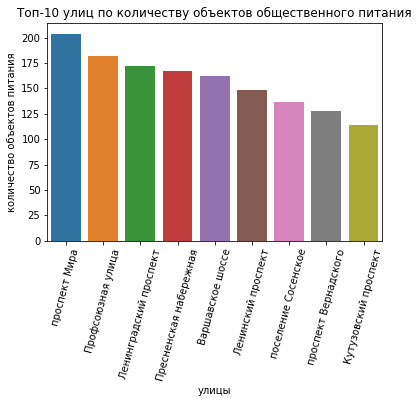

In [24]:
# Построим диаграмму топ-10 улиц по количеству объектов общественного питания.
sns.barplot(
           x='streetname',
            y='object_name_new',
            data=top_10
)
plt.xticks(rotation=75)
plt.xlabel('улицы')
plt.ylabel('количество объектов питания')
plt.title('Топ-10 улиц по количеству объектов общественного питания')

Вывод: в топ-10 улиц по количеству объектов общественного питания входят: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, поселение Сосенское, проспект Вернадского	и Кутузовский проспект.

In [25]:
# Встроим сторонний файл с данными улиц и районов в проект
spreadsheet_id = '15lzoJi1E_MO1yTHcjXBjrwx1mJWfSrUht6aZc36h52E'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df 

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [26]:
# Объединим две таблицы
top_10_area = top_10.merge(df, on = 'streetname', how ='left')
display(top_10_area)

,streetname,object_name_new,areaid,okrug,area
0,проспект Мира,204,70.0,СВАО,Алексеевский район
1,проспект Мира,204,86.0,СВАО,Ярославский Район
2,проспект Мира,204,78.0,СВАО,Район Марьина роща
3,проспект Мира,204,79.0,СВАО,Останкинский район
4,проспект Мира,204,81.0,СВАО,Район Ростокино
5,проспект Мира,204,82.0,СВАО,Район Свиблово
6,проспект Мира,204,16.0,ЦАО,Мещанский район
7,Профсоюзная улица,182,123.0,ЮЗАО,Академический район
8,Профсоюзная улица,182,132.0,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134.0,ЮЗАО,Район Ясенево


Вывод: одна улица находится в нескольких районах, поэтому сгруппируем датасет по районам и посчитаем, сколько улиц из топ-10 находятся в этих районах

In [27]:
display(top_10_area.groupby('area')['streetname'].count().reset_index().sort_values(by = 'streetname', ascending = False))

,area,streetname
11,Район Гагаринский,2
2,Донской район,2
3,Ломоносовский район,2
22,Район Теплый Стан,2
16,Район Проспект Вернадского,2
6,Обручевский район,2
23,Район Тропарево-Никулино,2
0,Академический район,1
24,Район Фили-Давыдково,1
25,Район Черемушки,1


Вывод: таким образом, самыми "богатыми" на заведения общественного питания районами являются: район Гагаринский, Донской район, Ломоносовский район, район Теплый Стан, район Проспект Вернадского, Обручевский район, район Тропарево-Никулино.

In [28]:
# Найдем число улиц с одним объектом общественного питания
aut_1 = data.groupby('streetname')['object_name_new'].count().reset_index()
aut_1 = aut_1.query('object_name_new == 1')
display(aut_1)

,streetname,object_name_new
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1851,улица Шеногина,1
1854,улица Шумилова,1
1855,улица Шумкина,1
1859,улица Щорса,1


Вывод: улиц с одним заведением общественного питания - 553

In [29]:
# Объединим две таблицы
aut_1_area = aut_1.merge(df, on = 'streetname', how ='left')
display(aut_1_area)

,streetname,object_name_new,areaid,okrug,area
0,1-й Балтийский переулок,1,54.0,САО,Район Аэропорт
1,1-й Басманный переулок,1,13.0,ЦАО,Басманный район
2,1-й Басманный переулок,1,15.0,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,82.0,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,120.0,ЮВАО,Рязанский район
...,...,...,...,...,...
594,улица Шеногина,1,92.0,СЗАО,Район Хорошево-Мневники
595,улица Шумилова,1,113.0,ЮВАО,Район Кузьминки
596,улица Шумкина,1,26.0,ВАО,Район Сокольники
597,улица Щорса,1,46.0,ЗАО,Район Солнцево


Вывод: одна улица находится в нескольких районах, поэтому сгруппируем датасет по районам и посчитаем, сколько улиц-аутсайдеров находятся в этих районах

In [30]:
display(aut_1_area.groupby('area')['streetname'].count().reset_index().sort_values(by = 'streetname').head(20))

,area,streetname
50,Район Марфино,1
54,Район Метрогородок,1
61,Район Очаково-Матвеевское,1
53,Район Матушкино-Савелки,1
18,Обручевский район,1
52,Район Марьино,1
15,Молжаниновский район,1
30,Район Гагаринский,1
48,Район Лианозово,1
57,Район Нагатино-Садовники,1


Вывод: исходя из полученных данных, улицы с одним объектом общественного питания находятся преимущественно в районах на окраине г.Москва.

In [31]:
# Проверим, насколько корректно соединились датасеты
display(aut_1_area[aut_1_area['area'].isnull()])

,streetname,object_name_new,areaid,okrug,area
39,104-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
80,26-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
94,3-я Подрезковская улица,1,NaN,NaN,NaN
97,30-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
98,31-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
99,34-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
100,38-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
107,42-й километр Калужского шоссе,1,NaN,NaN,NaN
108,42-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN
113,56-й километр Московской Кольцевой Автодороги,1,NaN,NaN,NaN


['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'поселение Сосенское',
 'проспект Вернадского',
 'Кутузовский проспект']

,index,id,object_name,chain,object_type,address,number,object_name_new,streetname
151,151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Андерсон,Варшавское шоссе
152,152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Subway,Варшавское шоссе
153,153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Ламаджо,Варшавское шоссе
154,154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Шаурма в пите,Варшавское шоссе
155,155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Выпечка,Варшавское шоссе


35.0

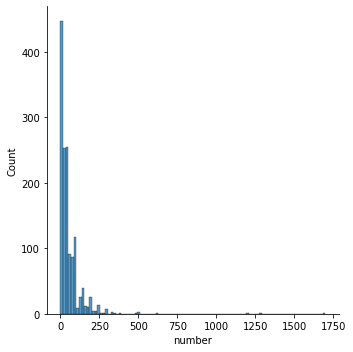

In [32]:
# Создадим отфильтрованный датафрейм с улицами их топ-10
streets = list(top_10["streetname"])
display(streets)
data_top = data.query('streetname in @streets')
display(data_top.head())
# Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания
sns.displot(data_top['number'], bins=100) 
display(data_top['number'].median())

Вывод: В среднем, на долю улиц с большим количеством объектов общественного питания приходится около 35 посадочных мест в одном объекте.

**ВЫВОДЫ:**
В ходе исследования мы выяснили:
1. В г.Москве по количеству заведений преобладают кафе, меньше всего - отделов кулинарии в магазинах.
2. Преобладают несетевые заведения (их больше в 4 раза).
3. Для кафе, закусочных, предприятий быстрого обслуживания, ресторанов, баров сетевое распространение не характерно. Сетевые заведения чаще встречаются среди, столовых, кафетерий, буфетов, для отделов кулинарии одинаково характерны и сетевые, и несетевые заведения.
4. Для сетевых заведений больше характерно мало заведений с большим количеством посадочных мест.
5. В среднем, больше всего посадочных мест в столовых. Меньше всего - в отделах кулинарии, закусочных, кафетериях.
6. В топ-10 улиц по количеству объектов общественного питания входят: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, поселение Сосенское, проспект Вернадского	и Кутузовский проспект.
7. Самыми "богатыми" на заведения общественного питания районами являются: район Гагаринский, Донской район, Ломоносовский район, район Теплый Стан, район Проспект Вернадского, Обручевский район, район Тропарево-Никулино (больше на юге и юго-западе Москвы).
8. Улиц с одним заведением общественного питания - 553, они находятся преимущественно в районах на окраине г.Москвы.
10. В среднем, на долю улиц с большим количеством объектов общественного питания приходится около 35 посадочных мест в одном объекте.

В качестве рекомендации можно сказать, что выгоднее всего открывать:
- небольшое заведение (около 35 посадочных мест)
- категория - кафе
- на юге и юго-западе Москвы(раз там много кафе, предположительно, там высокая проходимость и высокий спрос, а за счет уникальной идеи про роботов-официантов наше кафе может привлечь больше посетителей, а также за счет роботизации и автоматизации можно сократить расходы на зарплаты)
- относительно вопроса развития сети - можно остановиться на одном заведении, либо развивать в дальнейшем небольшую сеть